<a href="https://colab.research.google.com/github/Ahmed-Shatla/classify-sentiment-of-the-1.6-M-tweets-using-LSTM-Negative-Positive-/blob/main/LSTM_12th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


In [3]:
data = pd.read_csv('/content/drive/MyDrive/12th deep learning/training.csv',encoding="ISO-8859-1",names=['Target','ID','Date','Query_flag','User','Tweet_text'])
data.head()

,Target,ID,Date,Query_flag,User,Tweet_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
data['Target'].unique()

array([0, 4])

In [5]:
data.shape

(1600000, 6)

In [6]:
data.dtypes

Target         int64
ID             int64
Date          object
Query_flag    object
User          object
Tweet_text    object
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


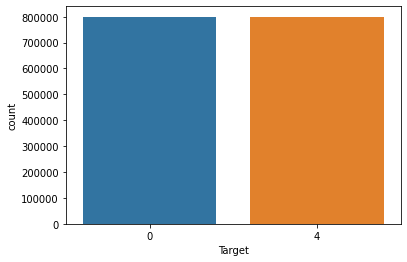

In [7]:
sns.countplot(data['Target'])

In [8]:
data.isna().sum()

Target        0
ID            0
Date          0
Query_flag    0
User          0
Tweet_text    0
dtype: int64

In [9]:
#Splitting tweets
#We will just use tweet_texts as input for the LSTM
temp = data['Tweet_text']
tweets = []
target = data['Target']
for i in range (len(data)):
  tweets.append(temp[i])
tweets[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [10]:
splitted_tweets = []
for tweet in tweets:
  splitted_tweets.append(tweet.split())

In [11]:
splitted_tweets[0]

['@switchfoot',
 'http://twitpic.com/2y1zl',
 '-',
 'Awww,',
 "that's",
 'a',
 'bummer.',
 'You',
 'shoulda',
 'got',
 'David',
 'Carr',
 'of',
 'Third',
 'Day',
 'to',
 'do',
 'it.',
 ';D']

#Downloading stop_words

In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
#example
stop_words[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [13]:
import re
def clean_texts(text):
  text = re.sub(r'#\w*','',text) #removing hashtags
  text = re.sub(r'@\w*','',text) #removing minshions
  text = re.sub(r'https?:\S*','',text) #removing http/s links
  text = re.sub(r'\d*','',text) #removing numbers
  text = re.sub(r'\W+',' ',text) #removing non words like (- , :)
  text = re.sub(r'_','',text) #removing underscore symbol
  text = re.sub(r'^\s','',text) #removing spaces at the begain of the sentences
  text = re.sub(r'\s$','',text) #removing spaces at the end of the sentences

  return list(text)

In [17]:
def remove_stopwords(words):
  cleaned = []
  for word in words:
    if word.lower() not in stop_words:
      cleaned.append(word)
  return cleaned

In [20]:
without_stopword = []
for tweet in splitted_tweets:
  without_stopword.append(remove_stopwords(tweet))

In [21]:
cleaned_tweets = []
for tweet in without_stopword:
  cleaned_tweets.append(clean_texts(tweet))

TypeError: ignored

In [ ]:
cleaned_tweets[:15]